# This notebook will explore stock data from the yfinance API and create data exports for visualization in Tableau

## 1. Initial EDA

In [25]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

stock_symbol = 'SPY'
start_date = '2010-01-01'
end_date = '2024-01-01'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)


stock_data.head()

#stock_data.describe()
#stock_data.info()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,86.860085,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.089981,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.151306,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.519196,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,87.810432,126402800


In [26]:
stock_data['return'] = stock_data['Close'].pct_change() * 100
stock_data['win'] = stock_data['return'] > 0
stock_data['Day_of_Week'] = stock_data.index.dayofweek

stock_data = stock_data.dropna()
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,return,win,Day_of_Week
Date,,,,,,,,,
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.089981,111579900,0.264710,True,1
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.151306,116074400,0.070406,True,2
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.519196,131091100,0.422129,True,3
2010-01-08,113.889999,114.620003,113.660004,114.570000,87.810432,126402800,0.332776,True,4
2010-01-11,115.080002,115.129997,114.239998,114.730003,87.933067,106375700,0.139656,True,0


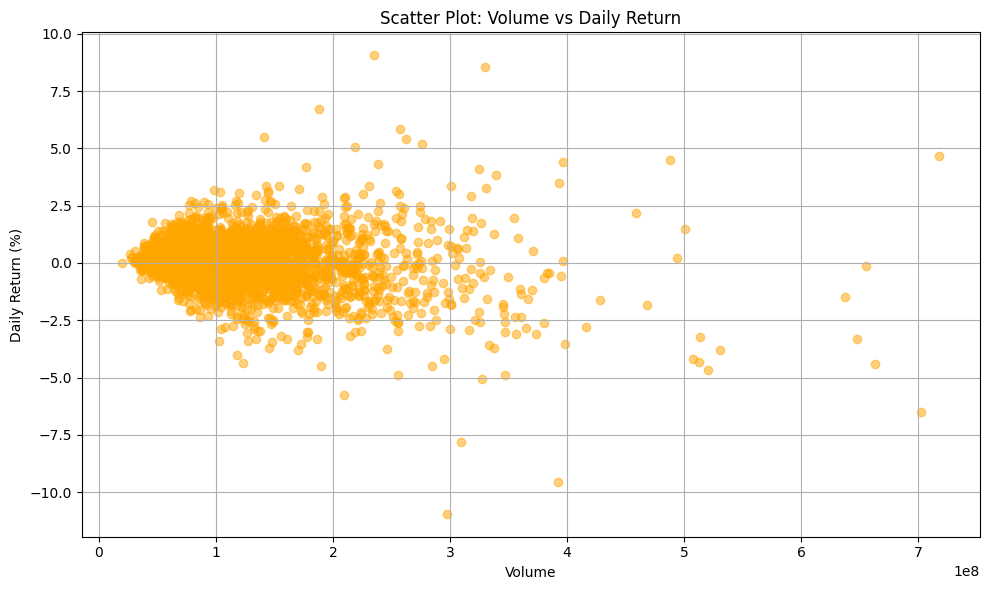

In [27]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Volume'], stock_data['return'], color='orange', alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Daily Return (%)')
plt.title('Scatter Plot: Volume vs Daily Return')
plt.grid(True)
plt.tight_layout()
plt.show()

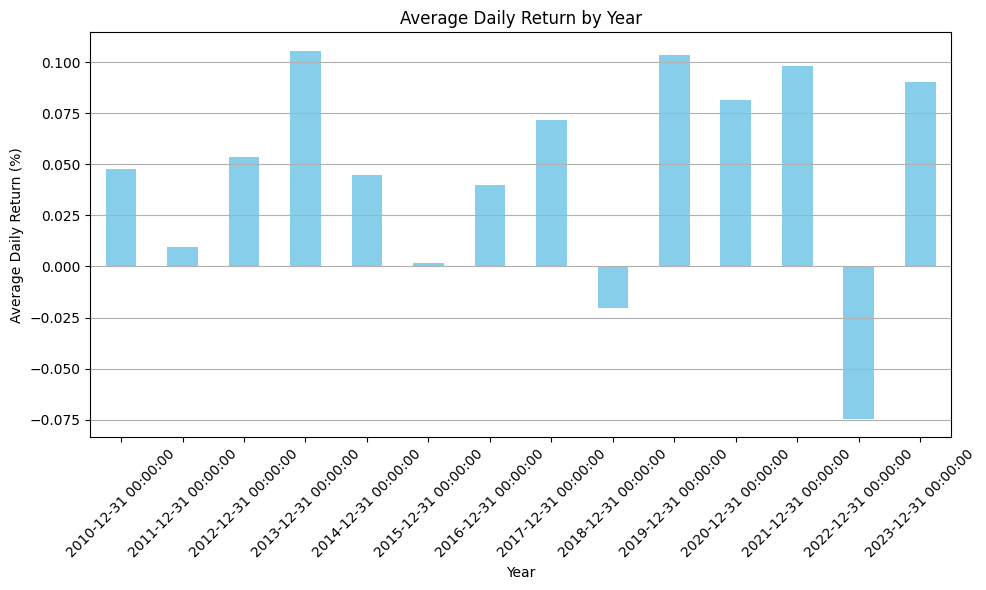

In [31]:
# Calculate average daily return for each month
monthly_return = stock_data['return'].resample('Y').mean()

# Create bar chart
plt.figure(figsize=(10, 6))
monthly_return.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Daily Return (%)')
plt.title('Average Daily Return by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

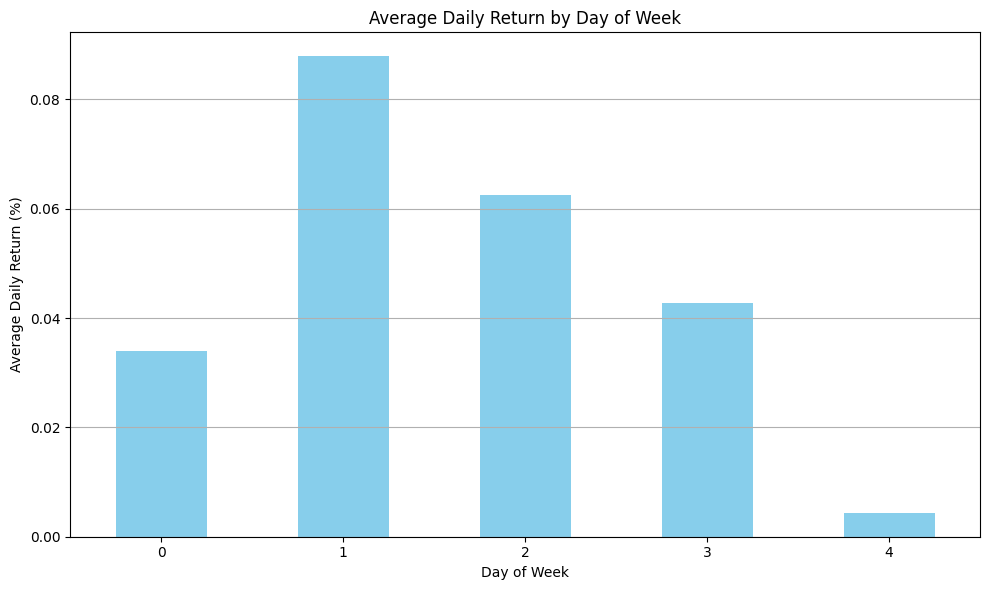

In [32]:
# Calculate average return for each day of the week
average_return_by_day = stock_data.groupby('Day_of_Week')['return'].mean()

# Create bar chart
plt.figure(figsize=(10, 6))
average_return_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Average Daily Return (%)')
plt.title('Average Daily Return by Day of Week')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()